<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/Global_CO2_Emissions_by_Country_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (14, 6)

In [2]:
url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
df = pd.read_csv(url)

# Step 2: Basic Inspection
print("=== First 5 Rows ===")
print(df.head())
print("\n=== Dataset Info ===")
print(df.info())
print("\n=== Missing Values (Top 20 columns) ===")
print(df.isnull().sum().sort_values(ascending=False).head(20))
print("\n=== Summary Statistics ===")
print(df.describe(include='all'))

=== First 5 Rows ===
       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                    

In [3]:
print("\n=== Unique Countries/Entities ===")
print(df['country'].nunique(), "countries")
print("\nYears Range:", df['year'].min(), "to", df['year'].max())


=== Unique Countries/Entities ===
255 countries

Years Range: 1750 to 2023


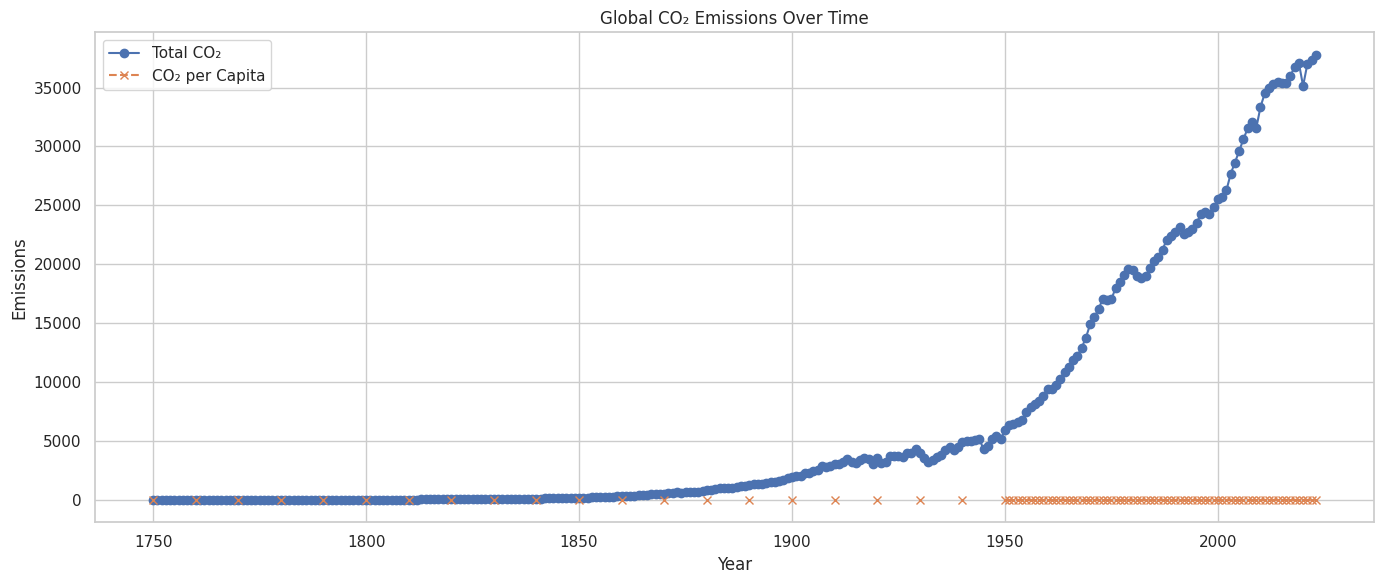

In [4]:
world_df = df[df['country'] == 'World']
plt.plot(world_df['year'], world_df['co2'], marker='o', linestyle='-', label='Total CO₂')
plt.plot(world_df['year'], world_df['co2_per_capita'], marker='x', linestyle='--', label='CO₂ per Capita')
plt.title("Global CO₂ Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2163487954.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_emitters, x='co2', y='country', palette='Reds_r')


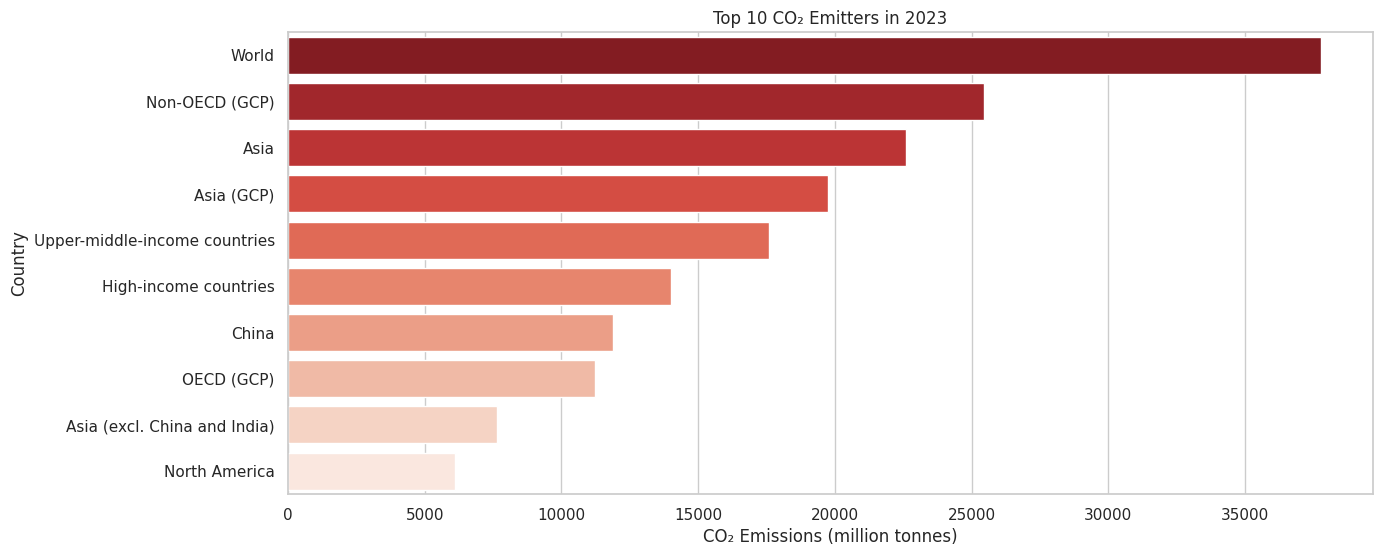

In [5]:
latest_year = df['year'].max()
latest_df = df[df['year'] == latest_year]
top_emitters = latest_df.sort_values('co2', ascending=False).head(10)

sns.barplot(data=top_emitters, x='co2', y='country', palette='Reds_r')
plt.title(f"Top 10 CO₂ Emitters in {latest_year}")
plt.xlabel("CO₂ Emissions (million tonnes)")
plt.ylabel("Country")
plt.show()

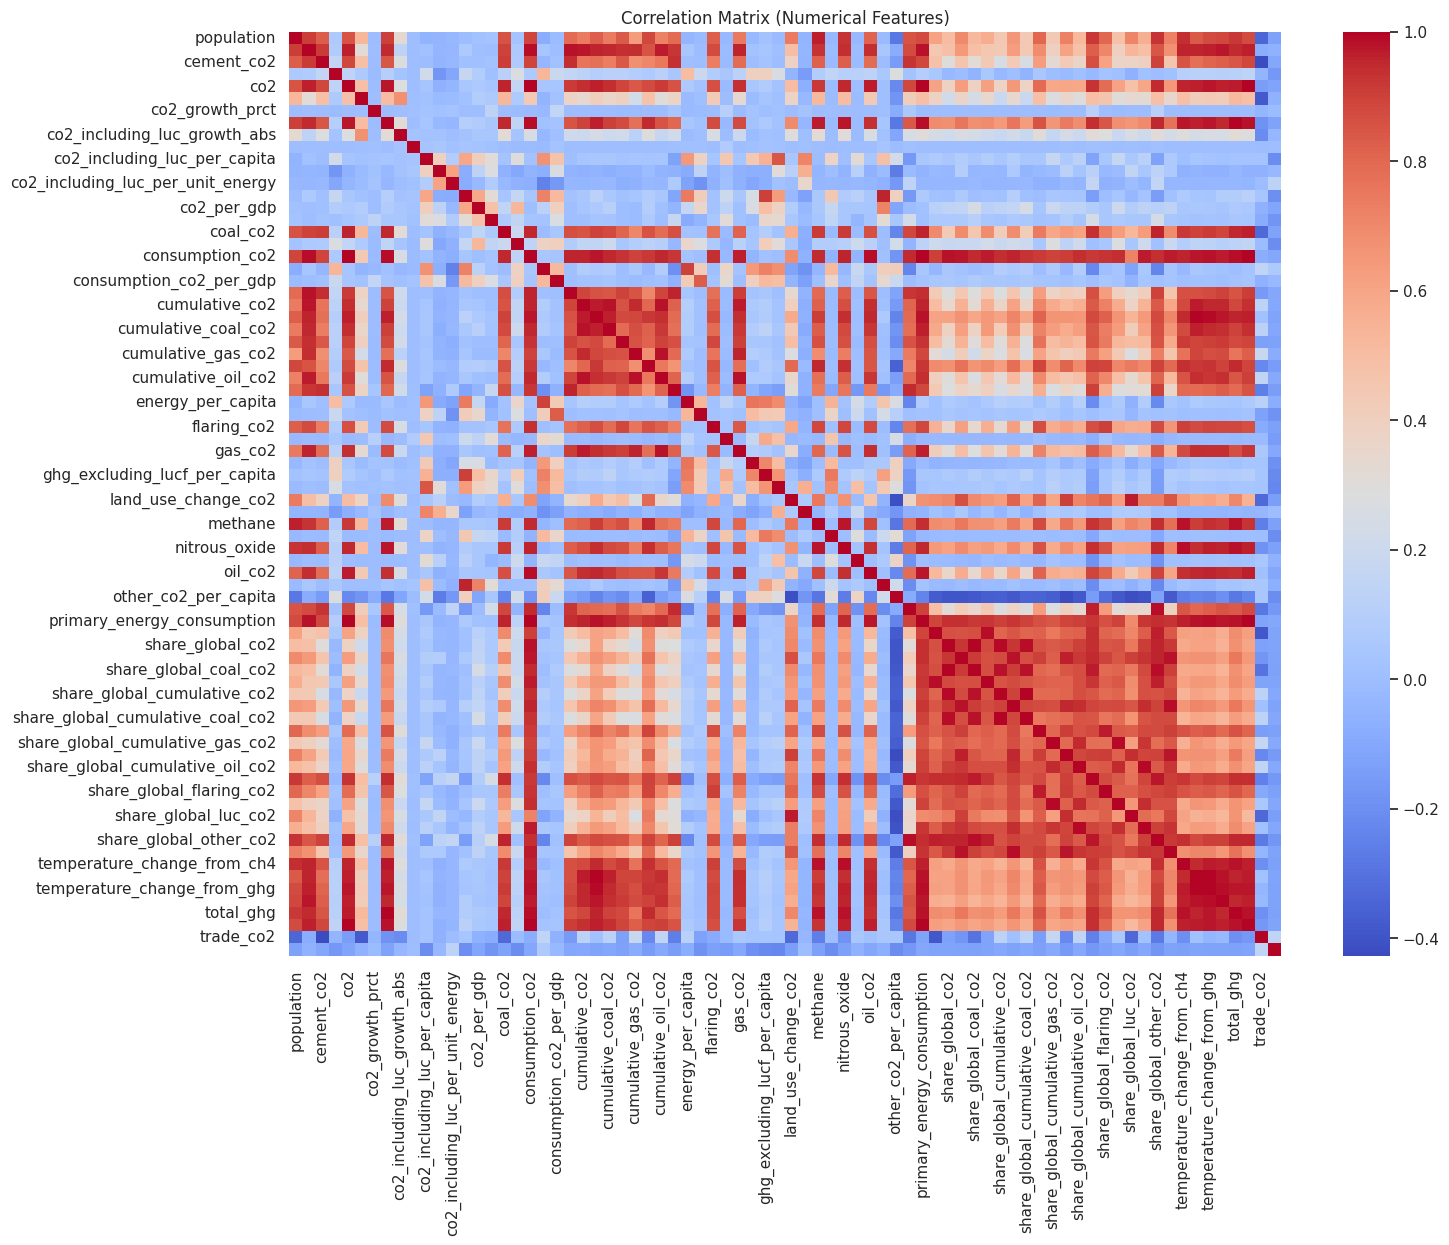

In [6]:
numeric_cols = df.select_dtypes(include='number').drop(columns=['year'])
corr = numeric_cols.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix (Numerical Features)")
plt.show()



=== Skewness & Kurtosis ===
                 co2: skew=9.06, kurtosis=109.29
      co2_per_capita: skew=29.22, kurtosis=1183.15
                 gdp: skew=32.60, kurtosis=1208.97
          population: skew=13.02, kurtosis=224.07
   energy_per_capita: skew=2.66, kurtosis=10.34


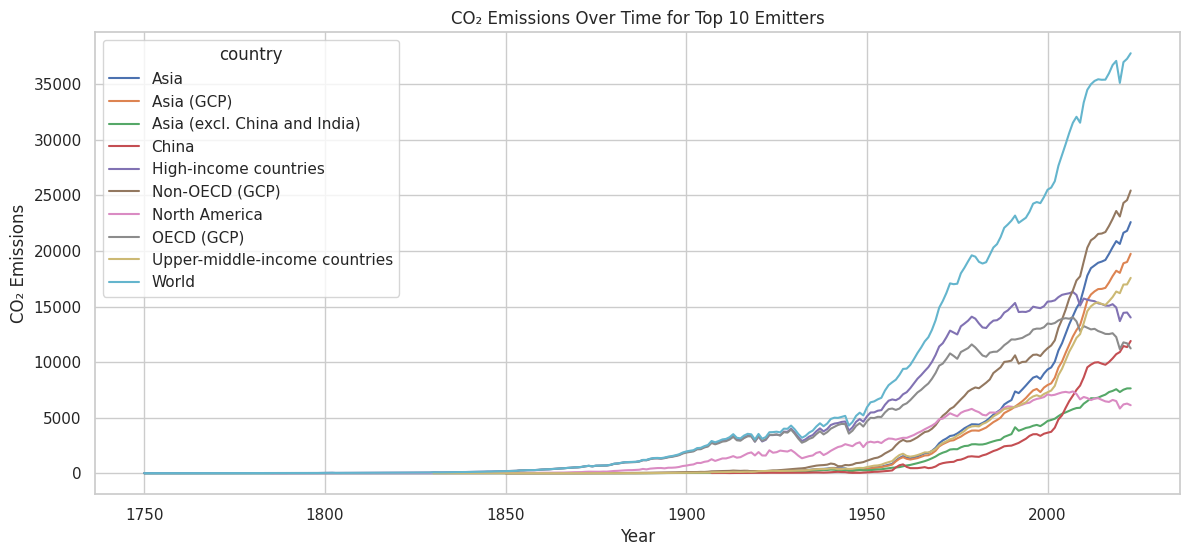

In [7]:
important_features = ['co2', 'co2_per_capita', 'gdp', 'population', 'energy_per_capita']
print("\n=== Skewness & Kurtosis ===")
for col in important_features:
    if col in df.columns:
        print(f"{col:>20}: skew={skew(df[col].dropna()):.2f}, kurtosis={kurtosis(df[col].dropna()):.2f}")

# Step 8: Emissions Over Time for Top Countries
top_countries = top_emitters['country'].tolist()
subset = df[df['country'].isin(top_countries)]
sns.lineplot(data=subset, x='year', y='co2', hue='country')
plt.title("CO₂ Emissions Over Time for Top 10 Emitters")
plt.ylabel("CO₂ Emissions")
plt.xlabel("Year")
plt.show()

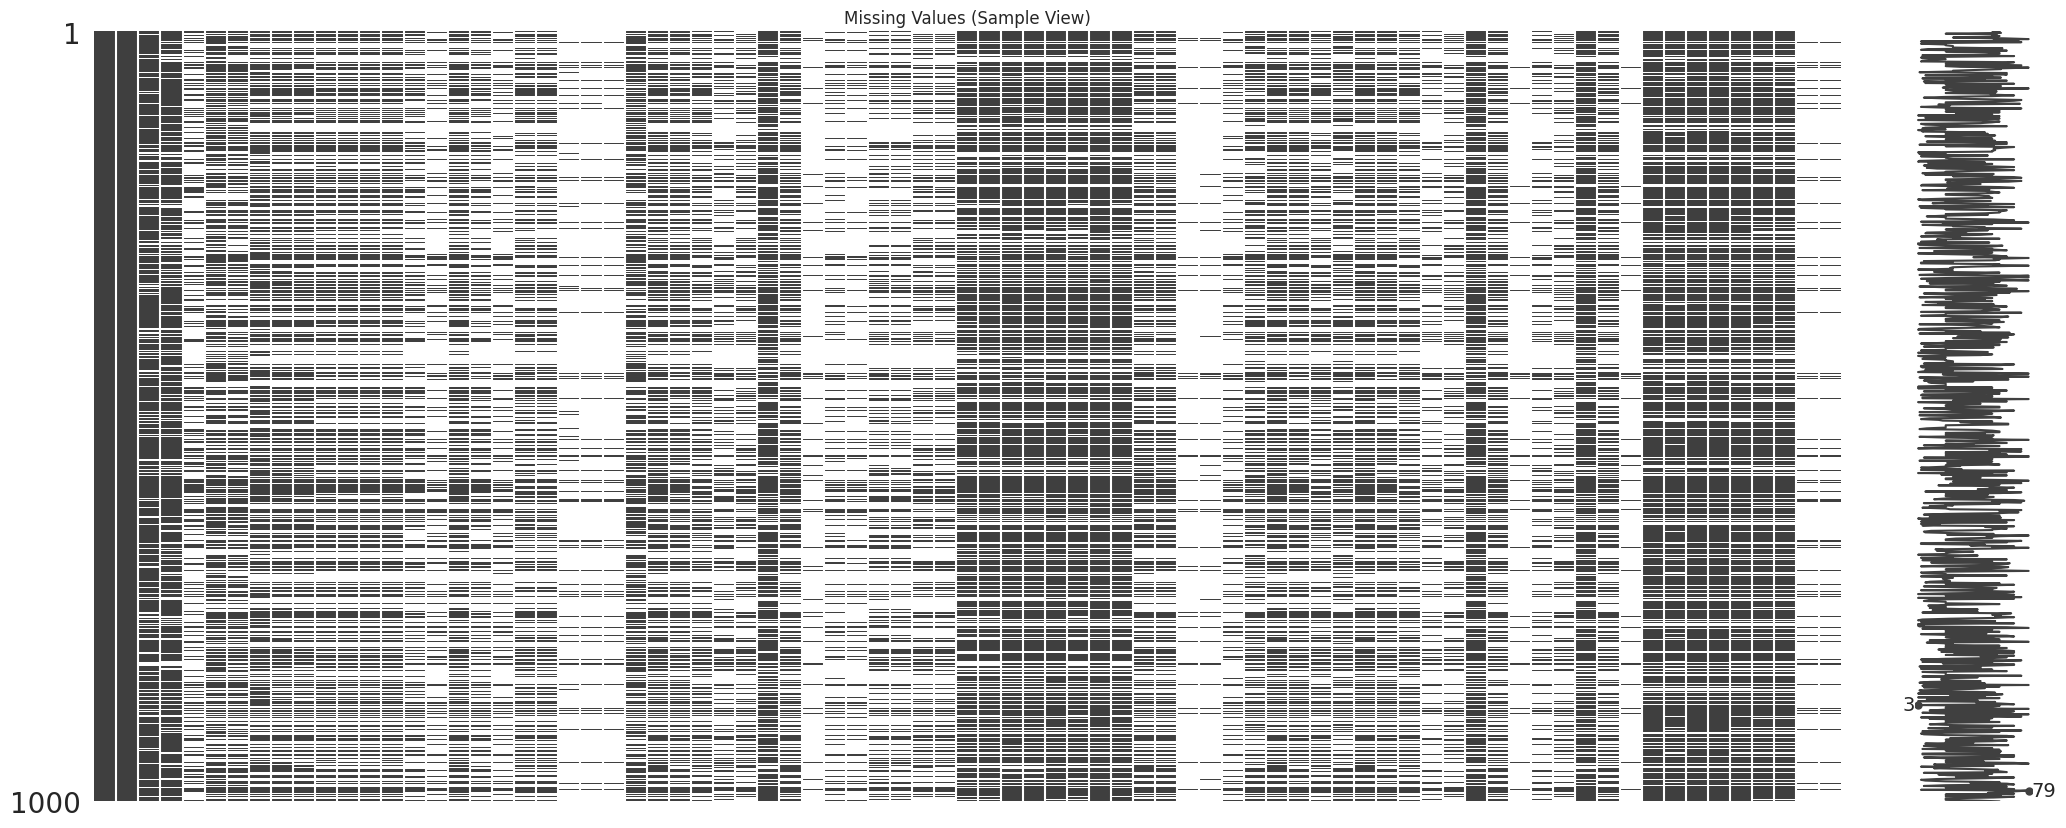

In [8]:
import missingno as msno
msno.matrix(df.sample(1000))
plt.title("Missing Values (Sample View)")
plt.show()